In [2]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

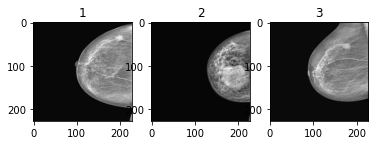

In [3]:
#reading a few images
I1=plt.imread("DATA/1.png")
I2=plt.imread("DATA/5.png")
I3=plt.imread("DATA/3.png")
plt.subplot(131) 
plt.imshow(I1,cmap=plt.get_cmap('gray'))
plt.title("1")
plt.subplot(132)
plt.imshow(I2,cmap=plt.get_cmap('gray'))
plt.title("2")
plt.subplot(133)
plt.imshow(I3,cmap=plt.get_cmap('gray'))
plt.title("3")

plt.show()


In [4]:
#taille d'une image 
I=plt.imread("DATA/4.png")
I.shape

(227, 227)

# Deviding of the database


# Stocking train images in a matrix

In [5]:
#matrice pour stocker les images de train
def stocker_images_train(nbr_im, filename):
    nomfic=filename+'1.png'
    I=plt.imread(nomfic)
    nl,nc=I.shape
    mat_image=np.zeros((nl,nc,int(nbr_im/2)))
    j=0
    for i in range(0,nbr_im,2):  
        file=filename+str(i+1)+".png"
        mat_image[:,:,j]=plt.imread(file)
        j=j+1
    
   
    return mat_image

# Stocking test images in a matrix

In [11]:
#matrice pour stocker les images de test
def stocker_images_test(nbr_im, filename):
    nomfic=filename+'1.png'
    I=plt.imread(nomfic)
    nl,nc=I.shape
    mat_image=np.zeros((nl,nc,nbr_im))
    j=0
    for i in range(1,nbr_im,2):  
        file=filename+str(i+1)+".png"
        mat_image[:,:,j]=plt.imread(file)
        j=j+1
    
   
    return mat_image

In [12]:
filename='DATA/'
nbr_im=212
mat_image_train=stocker_images_train(nbr_im, filename) 
mat_image_test=stocker_images_test(nbr_im, filename)

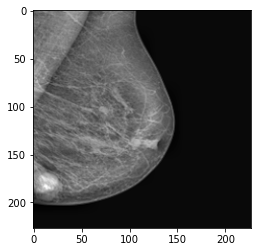

In [13]:
#image train
I=plt.imshow(mat_image_train[:,:,5],cmap=plt.get_cmap('gray'))
plt.show()

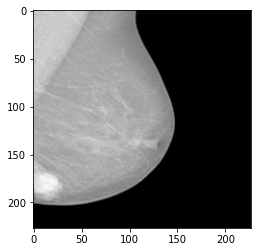

In [14]:
#image test
I=plt.imshow(mat_image_test[:,:,5],cmap=plt.get_cmap('gray'))
plt.show()

In [15]:
#matrix size for mat_image_train & mat_image_test
print(mat_image_train.shape)
print(mat_image_test.shape)

(227, 227, 106)
(227, 227, 212)


# Histogram

In [16]:
#calculating the histogram
def histo(I):
    h=np.zeros(256,dtype=int)
    I_m=np.around(I)
    for i in range(0,I.shape[0]):
        for j in range(0,I.shape[1]):
            h[int(I_m[i][j])]+=1 
    
    return h

In [17]:
h=histo(mat_image_train[:,:,5])
print(h[0:10])

[47929  3600     0     0     0     0     0     0     0     0]


In [18]:
#stocking the histograms in a matrix
def stocker_desc(mat_image):
    nl,nc,nbr_img=mat_image.shape #matrix contains 30images
    desc=np.zeros((nbr_img,256))
    for i in range(nbr_img):
        desc[i,:]=histo(mat_image[:,:,i])
  
    return desc

In [19]:
mat_desc_train=stocker_desc(mat_image_train)
mat_desc_test=stocker_desc(mat_image_test)
print(mat_desc_train)
print(mat_desc_test[0])

[[49777.  1752.     0. ...     0.     0.     0.]
 [49250.  2279.     0. ...     0.     0.     0.]
 [47692.  3837.     0. ...     0.     0.     0.]
 ...
 [48440.  3089.     0. ...     0.     0.     0.]
 [49764.  1765.     0. ...     0.     0.     0.]
 [48642.  2887.     0. ...     0.     0.     0.]]
[5.1514e+04 1.5000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e

In [20]:
#calculating the distance 
def distance(h1,h2):
    d=np.sqrt(np.sum((h1-h2)**2))
    return d 

In [21]:
#function that calculates the distance between the train images and the test images, to store them in a matrix 
def stocke_dist(mat_desc_train,mat_desc_test,nbr_img):
    distance_mat=np.zeros((nbr_img,nbr_img))
    for i in range(nbr_img):
        for j in range(nbr_img):
            distance_mat[i][j]=distance(mat_desc_train[i],mat_desc_test[j])
    
    
    return  distance_mat

# Results

In [22]:
nbr_img=106
distance_mat=stocke_dist(mat_desc_test,mat_desc_train,nbr_img)
print(distance_mat[:][0])
print(distance_mat[0][:])

[2456.48895784 3201.77950521 5405.12423539 9217.84399955 4057.37871045
 5069.95562111 2507.40064609 2654.47885657 1629.17402385 2494.67272403
 1769.18116653 3873.53094734 1848.37712602 1688.57099347 1945.95786183
 2849.64032818 4296.38080249 1989.79848226 4833.78195619 7933.73808491
 2484.77322909 3507.24963469 3350.27192926 4270.92495837 5143.49472635
 3224.40692221 5209.96276378 2702.56211769 5443.30800157 2685.59155495
 4958.23274968 4927.12005131 4853.58094606 5102.48253304 9222.08664023
 8362.24479431 4422.24580954 6434.6717088  4065.86399182 5214.20540447
 3908.8862864  5632.81261893 3983.83960521 5439.06536089 3361.58563776
 4328.90771442 7387.85164984 6782.56824514 3560.98975006 6554.8798616
 5099.65410592 7527.85879251 5160.4652891  3044.80179979 2546.99862583
 2344.76608641 4668.31896939 1574.01969492 5143.49472635 3621.80093324
 6257.8950135  6242.33866431 4252.54018206 5613.01362906 7397.75114477
 7500.98873483 2909.0372978  5580.48671712 9325.32423029 6922.57538782
 8677.6

In [23]:
mat_index=np.argsort(distance_mat,axis=1)
print(mat_index[0])
print(mat_index[90])

    

[ 57   8  13  10  12  14  17  72  55  85   0 104  20   9   6  54   7  29
  27  77  15  81  66  53  95  82   1  25  76  22  44  21  48  59  73  11
  40  74  79  42   4 105  38  62  23  16  45 103  86  36  99 102  90  56
  89  18  32 100  92  91  31  30   5  87  50  33  24  58  52  83  26  39
  78  84   2  43  28  97  67  63  41  80  98  75  61  88  60  37  49 101
  47  69  93  46  64  65  51  71  19  35  94  70  96   3  34  68]
[ 57   8  13  10  12  14  17  72  55  85   0 104  20   9   6  54   7  29
  27  77  15  81  66  53  95  82   1  25  76  22  44  21  48  59  73  11
  40  74  79  42   4 105  38  62  23  16  45 103  86  36  99 102  90  56
  89  18  32 100  92  91  31  30   5  87  50  33  24  58  52  83  26  39
  78  84   2  43  28  97  67  63  41  80  98  75  61  88  60  37  49 101
  47  69  93  46  64  65  51  71  19  35  94  70  96   3  34  68]


# Recall & Percision

In [24]:
def stock_pert(mat_index):
    [l,c]=mat_index.shape
    pert=np.zeros((l,c))
    for i in range(l):
        for j in range(c):
            if mat_index[i,j]<=70 and i<=70:
                pert[i,j]=1
            elif mat_index[i,j]>70 and i>70:
                pert[i,j]=1
    return pert

In [27]:
pert=stock_pert(mat_index)
pert[100]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0.])

In [20]:
def precision_rappel(pert):
    li,co=pert.shape[0],pert.shape[1]
    prec=np.zeros((li,co))
    rec=np.zeros((li,co))
    Accuracy=np.zeros((li,co))
    for k in range(li):
        pertinent=np.sum(pert[k,:])
        for i in range(1,co+1):
            VP=np.sum(pert[k,0:i])
            FP=i-VP
            FN=pertinent-VP
            VN=20-i-FN
            prec[k,i-1]=VP/(VP+FP)
            rec[k,i-1] =VP/(VP+FN)
            Accuracy[k,i-1]=VP+VN
    return prec,rec

In [21]:
prec,rec=precision_rappel(pert)

In [22]:
prec

array([[1.        , 1.        , 1.        , ..., 0.66346154, 0.66666667,
        0.66981132],
       [1.        , 1.        , 1.        , ..., 0.66346154, 0.66666667,
        0.66981132],
       [1.        , 1.        , 1.        , ..., 0.66346154, 0.66666667,
        0.66981132],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33653846, 0.33333333,
        0.33018868],
       [0.        , 0.        , 0.        , ..., 0.33653846, 0.33333333,
        0.33018868],
       [0.        , 0.        , 0.        , ..., 0.33653846, 0.33333333,
        0.33018868]])

In [23]:
s=np.sum(prec)/prec.shape
s

array([61.25833297, 61.25833297])

In [24]:
rec

array([[0.01408451, 0.02816901, 0.04225352, ..., 0.97183099, 0.98591549,
        1.        ],
       [0.01408451, 0.02816901, 0.04225352, ..., 0.97183099, 0.98591549,
        1.        ],
       [0.01408451, 0.02816901, 0.04225352, ..., 0.97183099, 0.98591549,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

<function matplotlib.pyplot.show(close=None, block=None)>

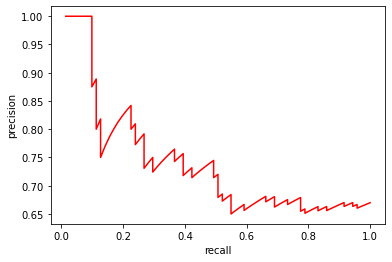

In [25]:
#courbe R-P pour la premiere image 
plt.ylabel("precision")
plt.xlabel("recall")
plt.plot(rec[0,:],prec[0,:],color="red")
plt.show

In [29]:
def tri_ind(mat):
    nl,nc=mat.shape
    mat2=np.zeros((nl,nc))
    for i in range(nc):
        col=[]
        col=mat[:,i]
        col2=sorted(mat[:,i])
        for j in range(len(col)):
            for k in range(len(col2)):
                if col[j]==col2[k]:
                    mat2[j,i]=k
        #print(mat2)
            
    return mat2

def cmc(distance_mat):
    tri_ind1=tri_ind(distance_mat)
    nl,nc=tri_ind1.shape
    n=min([nl,nc])
    tr=np.zeros(n)
    for i in range(0,n):
        tr[int(tri_ind1[i,i])]+=1/nl
    for j in range(0,n-1):
        tr[j+1]+=tr[j]

    return tr

In [30]:
tr=cmc(distance_mat)
print(tr)

[0.00943396 0.01886792 0.02830189 0.03773585 0.04716981 0.05660377
 0.06603774 0.0754717  0.08490566 0.09433962 0.10377358 0.11320755
 0.12264151 0.13207547 0.14150943 0.1509434  0.16037736 0.16981132
 0.17924528 0.18867925 0.19811321 0.20754717 0.21698113 0.22641509
 0.22641509 0.24528302 0.25471698 0.25471698 0.27358491 0.28301887
 0.29245283 0.30188679 0.31132075 0.32075472 0.33018868 0.33018868
 0.3490566  0.35849057 0.36792453 0.37735849 0.38679245 0.39622642
 0.40566038 0.40566038 0.40566038 0.43396226 0.44339623 0.45283019
 0.46226415 0.46226415 0.48113208 0.48113208 0.5        0.5
 0.5        0.52830189 0.53773585 0.53773585 0.55660377 0.56603774
 0.5754717  0.58490566 0.58490566 0.58490566 0.61320755 0.61320755
 0.63207547 0.63207547 0.6509434  0.6509434  0.6509434  0.6509434
 0.6509434  0.6509434  0.6509434  0.71698113 0.72641509 0.73584906
 0.74528302 0.74528302 0.74528302 0.74528302 0.74528302 0.74528302
 0.74528302 0.74528302 0.74528302 0.74528302 0.74528302 0.74528302
 0.

Text(0, 0.5, 'pourcentage')

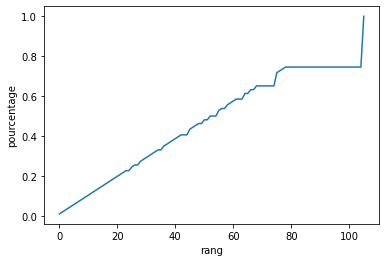

In [32]:
rang=np.arange(0,106)
plt.plot(rang,tr)
plt.xlabel('rang')
plt.ylabel('pourcentage')

In [33]:
#Confusion matrix
filename='DATA/'
def matrice_de_confusion(filename,ind,nbr_im_appr):
    D=[]
    I=plt.imread(filename+str(ind)+'.png')
    h=histo(I)
    for i in range(1,213):
        if i==ind:
            continue
        In=plt.imread(filename+str(i)+'.png')
        hn=histo(In)
        D.append((distance(h,hn),i))
    D.sort
    VP,VN,FP,FN=0,0,0,0
    if ind<=142:
        for i in range(nbr_im_appr):
            if D[i][1]<=142:
                VP+=1
            else:
                FP+=1
        FN=142-VP
        VN=70-FP
    else:
        for i in range(nbr_im_appr):
            if D[i][1]>142:
                VP+=1
            else:
                FP+=1
        FN=70-VP
        VN=142-FP
    matr_conf=np.array([[VP,FP],[FN,VN]])
    return matr_conf

In [34]:
matrice_conf=matrice_de_confusion(filename,1,20)

In [35]:
matrice_conf

array([[ 20,   0],
       [122,  70]])